# Neural network in tensorflow.keras
Using a neural net to classify handwritten numbers.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

print('Tensorflow', tf.__version__)

Tensorflow 2.1.0


## Load data

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


60,000 training examples, images are 28x28 pixels.

In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


And 10,000 test examples.

In [5]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Data are digits 0-9.

## Explore and format data

In [6]:
max_val = np.max(x_train)
max_val

255

The images are 8-bit. We need to normalise them.

In [7]:
# Normalise data
x_train = x_train/max_val
x_test = x_test/max_val

np.max(x_train)

1.0

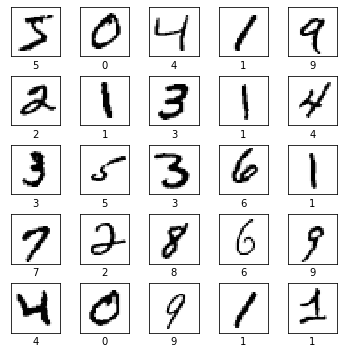

In [8]:
# Display some data
n_train = x_train.shape[0]
n_images = 25
display_rows = math.floor(math.sqrt(n_images))
display_cols = math.ceil(n_images/display_rows)

sel = np.random.randint(low=0, high=n_train, size=n_images)
plt.figure(figsize=(6, 6))
for i in range(n_images):
    image = x_train[i]
    plt.subplot(display_cols, display_rows, i+1)
    plt.xlabel(y_train[i])
    plt.imshow(image, cmap='Greys')
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(hspace=0.4)
plt.show()

## Define neural net model

In [9]:
image_shape = x_train.shape[1:] # (28, 28)
n_features = np.prod(x_train.shape[1:]) # pixels per image, i.e. 28*28
n_classes = len(set(y_train)) # 10
hidden_layer_size = int(math.sqrt(n_features*n_classes))

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=image_shape),
    keras.layers.Dense(hidden_layer_size, activation='relu'),
    keras.layers.Dense(n_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 88)                69080     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                890       
Total params: 69,970
Trainable params: 69,970
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

## Train

In [12]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2720 - accuracy: 0.9222
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1242 - accuracy: 0.9641
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0878 - accuracy: 0.9744
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0680 - accuracy: 0.9797
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0547 - accuracy: 0.9831
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0439 - accuracy: 0.9861
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0370 - accuracy: 0.9885
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0303 - accuracy: 0.9908
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0256 - accuracy: 0.9920
Epoch 10/10
60

## Test

In [13]:
test_acc = model.evaluate(x_test, y_test)[1]
print('Test accuracy: %.2f%%' %(test_acc*100))

10000/10000 [==============================] - 1s 52us/sample - loss: 0.0774 - accuracy: 0.9779
Test accuracy: 97.79%


In [14]:
x_pred = model.predict(x_test)
x_pred[0]

array([ -5.7814703 , -15.371113  ,  -0.33710498,   3.0842822 ,
       -18.49006   ,  -9.507769  , -20.04048   ,  11.315777  ,
        -5.6258416 ,   0.33937216], dtype=float32)

Output is logits. We need to convert this into labels.

In [15]:
x_pred_labels = np.argmax(x_pred, axis=1)
x_pred_labels[0]

7

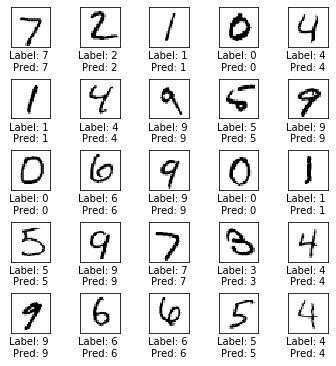

In [16]:
# Display some predictions, just for fun
n_test = x_test.shape[0]
n_images = 25
display_rows = math.floor(math.sqrt(n_images))
display_cols = math.ceil(n_images/display_rows)

sel = np.random.randint(low=0, high=n_test, size=n_images)
plt.figure(figsize=(6, 6))
for i in range(n_images):
    image = x_test[i]
    plt.subplot(display_cols, display_rows, i+1)
    plt.xlabel('Label: %d \nPred: %d' %(y_test[i], x_pred_labels[i]))
    plt.imshow(image, cmap='Greys')
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(hspace=0.8)
plt.show()